In [1]:
#Imports
import os
import shutil
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from pathFunc import dbPath, dataDir
from pathlib import Path

In [2]:
file_path =dataDir().joinpath('conc_clean.csv')
df1 = pd.read_csv(file_path)

In [3]:
combined_df=df1

In [4]:
"""holidays_df = pd.read_csv('Data\Holidays\Holidays.csv')
holidays_df.head()"""

"holidays_df = pd.read_csv('Data\\Holidays\\Holidays.csv')\nholidays_df.head()"

In [5]:
# Load the cleaned data into a dataframe
df = combined_df

# Convert the 'Month' column to a pandas datetime object
df['Month'] = pd.to_datetime(df['Month'])

# Filter the dataframe to only include rows with 'Burglary' in the 'Crime type' column
burglary_df = df[df['Crime type'] == 'Burglary']

# Create a new dataframe with every month of all years
all_months = pd.DataFrame(pd.date_range(start='2010-12-01', end='2023-01-01', freq='MS'), columns=['Month'])

# Group the 'Burglary' dataframe by month and count the number of rows in each month
monthly_counts = burglary_df.groupby(pd.Grouper(key='Month', freq='MS'))['Crime type'].count()

# Combine the 'all_months' dataframe and the 'monthly_counts' series
combined_df_copy = pd.merge(all_months, pd.DataFrame(monthly_counts), how='left', left_on='Month', right_on='Month')

# Fill any missing values with 0
combined_df_copy.fillna(0, inplace=True)

# Rename the 'Crime type' column to 'Number of Burglaries'
combined_df_copy.rename(columns={'Crime type': 'Number of Burglaries'}, inplace=True)

# Set the 'Month' column as the index
combined_df_copy.set_index('Month', inplace=True)
combined_df_copy = combined_df_copy.reset_index()

# Preview the resulting dataframe
combined_df_copy.head()

,Month,Number of Burglaries
0,2010-12-01,7897
1,2011-01-01,9023
2,2011-02-01,7778
3,2011-03-01,8314
4,2011-04-01,7598


In [6]:
"""# Melt the year columns and stack them into a new column called "Year-Month"
sunlight_df_melted = pd.melt(weather_df, id_vars=['Calendar period'], var_name='Year', value_name='Sunlight')

# Combine the "Calendar period" and "Year" columns into a new "Year-Month" column
sunlight_df_melted['Year-Month'] = sunlight_df_melted['Calendar period'] + '-' + sunlight_df_melted['Year']

# Drop the original "Calendar period" and "Year" columns
sunlight_df_melted.drop(columns=['Calendar period', 'Year'], inplace=True)
#convert to datime
sunlight_df_melted['Year-Month'] = pd.to_datetime(sunlight_df_melted['Year-Month'], format='%B-%Y')
# Print the resulting dataframe

sunlight_df_melted.head()
"""

'# Melt the year columns and stack them into a new column called "Year-Month"\nsunlight_df_melted = pd.melt(weather_df, id_vars=[\'Calendar period\'], var_name=\'Year\', value_name=\'Sunlight\')\n\n# Combine the "Calendar period" and "Year" columns into a new "Year-Month" column\nsunlight_df_melted[\'Year-Month\'] = sunlight_df_melted[\'Calendar period\'] + \'-\' + sunlight_df_melted[\'Year\']\n\n# Drop the original "Calendar period" and "Year" columns\nsunlight_df_melted.drop(columns=[\'Calendar period\', \'Year\'], inplace=True)\n#convert to datime\nsunlight_df_melted[\'Year-Month\'] = pd.to_datetime(sunlight_df_melted[\'Year-Month\'], format=\'%B-%Y\')\n# Print the resulting dataframe\n\nsunlight_df_melted.head()\n'

In [7]:
"""sunlight_df_melted = sunlight_df_melted.dropna()
output_path ="Data\\sunlight_updated.csv"
sunlight_df_melted.to_csv(output_path, index=False)
"""

'sunlight_df_melted = sunlight_df_melted.dropna()\noutput_path ="Data\\sunlight_updated.csv"\nsunlight_df_melted.to_csv(output_path, index=False)\n'

In [8]:
sunlight_df_melted=pd.read_csv(dataDir().joinpath('sunlight_updated.csv'))
sunlight_df_melted['Year-Month'] = pd.to_datetime(sunlight_df_melted['Year-Month'])
sunlight_df_melted['Percentage Change'] = sunlight_df_melted['Sunlight'].pct_change() * 100
sunlight_df_melted


,Sunlight,Year-Month,Percentage Change
0,2.448102,2001-01-01,NaN
1,3.125319,2001-02-01,27.662976
2,2.953300,2001-03-01,-5.504067
3,4.744445,2001-04-01,60.648951
4,7.725524,2001-05-01,62.833055
...,...,...,...
262,1.935724,2022-11-01,-53.009370
263,1.894136,2022-12-01,-2.148461
264,2.393847,2023-01-01,26.382040
265,3.197894,2023-02-01,33.588073


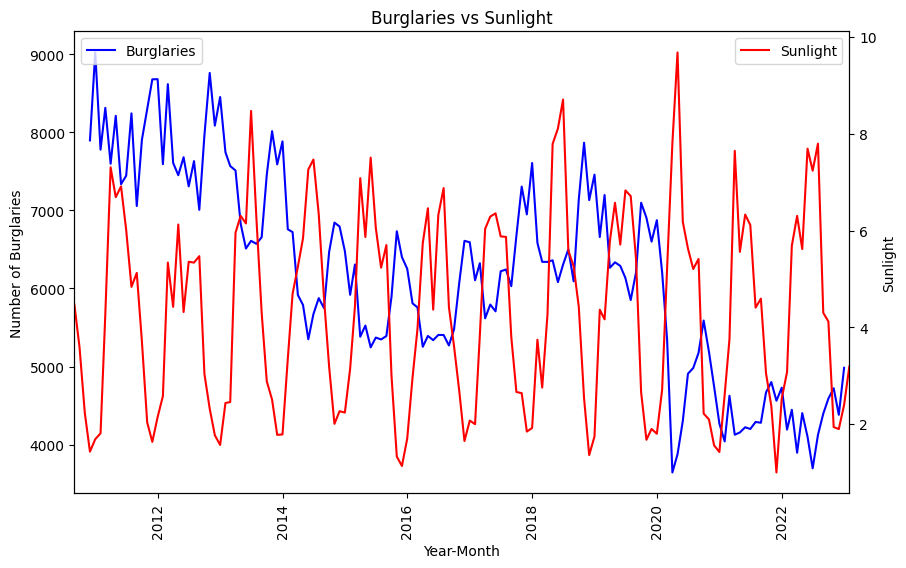

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming you have two dataframes df1 and df2 with a common 'Year-Month' column
# and the data you want to plot is in 'Value' column of each dataframe
x1 = combined_df_copy['Month']
y1 = combined_df_copy['Number of Burglaries']

x2 = sunlight_df_melted['Year-Month']
y2 = sunlight_df_melted['Percentage Change']

x3  = sunlight_df_melted['Year-Month']
y3 = sunlight_df_melted['Sunlight']

# Plotting the graphs
ax.plot(x1, y1, label='Burglaries', c='b')
ax2 = ax.twinx()
#ax2.plot(x2, y2, label='Sunlight %', c='r')
ax2.plot(x3, y3, label='Sunlight', c='r')

# Adding title and axis labels
ax.set_title('Burglaries vs Sunlight')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Burglaries')
ax2.set_ylabel('Sunlight')

# Rotating the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Adding legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_xlim(pd.Timestamp('2010-09-01'), pd.Timestamp('2023-02-01'))
# Displaying the plot
plt.show()


In [53]:
"""holidays_df

# generate a range of dates for the 10-year period
start_date = pd.Timestamp('2010-09-01')
end_date = pd.Timestamp('2023-02-28')
dates = pd.date_range(start=start_date, end=end_date, freq='MS')

# create a list of dataframes, each one being the original dataframe for a year
dfs = [holidays_df.assign(Year=date.year) for date in dates]

# concatenate the dataframes into a single one
df_10years = pd.concat(dfs, ignore_index=True)

df_10years['Year-Month'] = pd.to_datetime(df_10years[['Year', 'Month']].assign(day=1))

# drop the 'year' and 'month' columns
df_10years.drop(columns=['Year', 'Month', 'Month_name'], inplace=True, axis=1)
df_10years.head()"""

"holidays_df\n\n# generate a range of dates for the 10-year period\nstart_date = pd.Timestamp('2010-09-01')\nend_date = pd.Timestamp('2023-02-28')\ndates = pd.date_range(start=start_date, end=end_date, freq='MS')\n\n# create a list of dataframes, each one being the original dataframe for a year\ndfs = [holidays_df.assign(Year=date.year) for date in dates]\n\n# concatenate the dataframes into a single one\ndf_10years = pd.concat(dfs, ignore_index=True)\n\ndf_10years['Year-Month'] = pd.to_datetime(df_10years[['Year', 'Month']].assign(day=1))\n\n# drop the 'year' and 'month' columns\ndf_10years.drop(columns=['Year', 'Month', 'Month_name'], inplace=True, axis=1)\ndf_10years.head()"

In [54]:
"""fig, ax = plt.subplots(figsize=(10, 6))

# Assuming you have two dataframes df1 and df2 with a common 'Year-Month' column
# and the data you want to plot is in 'Value' column of each dataframe
x1 = combined_df_copy['Month']
y1 = combined_df_copy['Number of Burglaries']

x2 = df_10years['Year-Month']
y2 = df_10years['Holidays']*100

# Plotting the graphs
ax.bar(x1, y1, label='Burglaries', width=6)
ax2 = ax.twinx()
ax2.bar(x2, y2, label='Total Holidays', color='y', width=6)

# Adding title and axis labels
ax.set_title('Burglaries vs School Holidays')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of Burglaries')
#ax2.set_ylabel('Total Holidays')

# Rotating the x-axis labels for better visibility
ax.tick_params(axis='x', rotation=90)

# Adding legend
ax.legend(loc='upper left')
#ax2.legend(loc='upper right')

ax.set_xlim(pd.Timestamp('2013-09-01'), pd.Timestamp('2018-02-01'))
# Displaying the plot
ax.bar_width = 10
plt.show()"""


"fig, ax = plt.subplots(figsize=(10, 6))\n\n# Assuming you have two dataframes df1 and df2 with a common 'Year-Month' column\n# and the data you want to plot is in 'Value' column of each dataframe\nx1 = combined_df_copy['Month']\ny1 = combined_df_copy['Number of Burglaries']\n\nx2 = df_10years['Year-Month']\ny2 = df_10years['Holidays']*100\n\n# Plotting the graphs\nax.bar(x1, y1, label='Burglaries', width=6)\nax2 = ax.twinx()\nax2.bar(x2, y2, label='Total Holidays', color='y', width=6)\n\n# Adding title and axis labels\nax.set_title('Burglaries vs School Holidays')\nax.set_xlabel('Year-Month')\nax.set_ylabel('Number of Burglaries')\n#ax2.set_ylabel('Total Holidays')\n\n# Rotating the x-axis labels for better visibility\nax.tick_params(axis='x', rotation=90)\n\n# Adding legend\nax.legend(loc='upper left')\n#ax2.legend(loc='upper right')\n\nax.set_xlim(pd.Timestamp('2013-09-01'), pd.Timestamp('2018-02-01'))\n# Displaying the plot\nax.bar_width = 10\nplt.show()"

In [55]:
#housing DF

df_housing = pd.read_excel(dataDir().joinpath('housing_combined.xlsx'))
df_housing

,LSOA code,LSOA name,Owned or shared ownership,Private Rented or lives rent free,Social Rented,Proportion social,Proportion rented,Detached whole house or bungalow,Semi-detached whole house or bungalow,Terraced (including end-terrace) whole house or bungalow,"Flat, maisonette or apartment",A caravan or other mobile or temporary structure,Proportion of indep,1 bedroom,2 bedrooms,3 bedrooms,4 or more bedrooms,Missing,Proportion small house
0,E01000001,City of London 001A,485,330,20,0.023952,0.419162,0,0,15,1060,0,0.013953,375,280,140,45,0,0.779762
1,E01000002,City of London 001B,435,365,25,0.030303,0.472727,0,0,30,1145,0,0.025532,405,265,100,50,0,0.817073
2,E01000003,City of London 001C,380,335,300,0.295567,0.625616,0,0,0,1280,0,0.000000,650,300,60,0,0,0.940594
3,E01000005,City of London 001E,40,105,335,0.697917,0.916667,0,0,0,615,0,0.000000,240,135,95,0,0,0.797872
4,E01000006,Barking and Dagenham 016A,275,255,25,0.045045,0.504505,35,90,300,155,0,0.732759,95,70,255,130,0,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35667,W01002036,Vale of Glamorgan 005G,455,205,110,0.142857,0.409091,25,55,300,455,0,0.455090,95,370,200,105,0,0.603896
35668,W01002037,Vale of Glamorgan 005H,340,185,40,0.070796,0.398230,0,55,345,215,10,0.650407,105,215,155,90,0,0.566372
35669,W01002038,Vale of Glamorgan 014G,410,90,80,0.137931,0.293103,120,210,130,145,0,0.760331,30,210,230,110,0,0.413793
35670,W01002039,Vale of Glamorgan 014H,535,55,80,0.119403,0.201493,455,115,90,25,0,0.963504,20,85,150,410,0,0.157895


In [56]:

df_dens = pd.read_excel(dataDir().joinpath('density_combined.xlsx'))
df_dens

,LSOA code,LSOA name,Area Sq Km,People per Sq Km,Year,Population,LSOA Name
0,E01020634,County Durham 001A,6.4975,241.323586,2011.0,NaN,NaN
1,E01020635,County Durham 001B,1.6963,811.766787,2011.0,NaN,NaN
2,E01020636,County Durham 001C,0.9272,1827.006040,2011.0,NaN,NaN
3,E01020654,County Durham 001D,0.9884,1764.467827,2011.0,NaN,NaN
4,E01020676,County Durham 001E,5.4717,277.244732,2011.0,NaN,NaN
...,...,...,...,...,...,...,...
347525,W01001320,NaN,1.1098,1288.520454,NaN,1430.0,Merthyr Tydfil 007C
347526,W01001321,NaN,4.9777,316.612090,NaN,1576.0,Merthyr Tydfil 007D
347527,W01001322,NaN,0.6255,2599.520384,NaN,1626.0,Merthyr Tydfil 007E
347528,W01001324,NaN,3.8036,553.685982,NaN,2106.0,Merthyr Tydfil 003E


In [57]:

combined_df['Year']= combined_df['Month'].dt.year
#temp_df = combined_df[(combined_df['Crime type']=='Burglary') & (combined_df['Year']==2019 )]
temp_df = combined_df[(combined_df['Crime type']=='Burglary')]
df_burg = temp_df.groupby(['LSOA code', 'LSOA name', 'Year']).size().reset_index(name='Burglaries')
df_burg #[burg_2018['Burglaries']==40]
df_burg_2019=df_burg[df_burg['Year']==2019]


In [58]:
#combined_df[combined_df['LSOA code']=='E01000005']

In [59]:
bar_df=df_burg[df_burg['LSOA name'].str.contains('Barnet')]
bar_df_2019=df_burg_2019[df_burg_2019['LSOA name'].str.contains('Barnet')]
#bar_df[(bar_df['LSOA code'] == 'E01033595') & (bar_df['Month'] == '2019-10')]
bar_df

,LSOA code,LSOA name,Year,Burglaries
1436,E01000115,Barnet 009A,2011,8
1437,E01000115,Barnet 009A,2012,18
1438,E01000115,Barnet 009A,2013,9
1439,E01000115,Barnet 009A,2014,8
1440,E01000115,Barnet 009A,2015,10
...,...,...,...,...
63189,E01033573,Barnet 030F,2019,9
63190,E01033573,Barnet 030F,2020,25
63191,E01033573,Barnet 030F,2021,33
63192,E01033573,Barnet 030F,2022,54


In [60]:
merged_df_house = pd.merge(bar_df_2019, df_housing, how='inner', on=['LSOA code', 'LSOA name'])
merged_df_house

,LSOA code,LSOA name,Year,Burglaries,Owned or shared ownership,Private Rented or lives rent free,Social Rented,Proportion social,Proportion rented,Detached whole house or bungalow,...,Terraced (including end-terrace) whole house or bungalow,"Flat, maisonette or apartment",A caravan or other mobile or temporary structure,Proportion of indep,1 bedroom,2 bedrooms,3 bedrooms,4 or more bedrooms,Missing,Proportion small house
0,E01000115,Barnet 009A,2019,12,435,45,0,0.000000,0.093750,135,...,0,15,0,0.969072,0,10,205,255,0,0.021277
1,E01000116,Barnet 009B,2019,9,475,95,45,0.073171,0.227642,15,...,285,75,0,0.880952,55,30,320,210,0,0.138211
2,E01000117,Barnet 010A,2019,19,560,125,0,0.000000,0.182482,25,...,135,160,0,0.777778,25,200,300,165,0,0.326087
3,E01000118,Barnet 010B,2019,18,605,130,20,0.026490,0.198675,10,...,255,150,0,0.805195,45,120,370,215,0,0.220000
4,E01000119,Barnet 009C,2019,8,480,105,40,0.064000,0.232000,65,...,160,30,0,0.952756,20,55,320,235,0,0.119048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,E01000320,Barnet 011D,2019,15,525,235,50,0.061728,0.351852,55,...,175,435,0,0.485207,185,225,175,225,0,0.506173
200,E01000321,Barnet 012E,2019,15,355,415,40,0.049383,0.561728,15,...,205,525,0,0.378698,220,295,155,135,0,0.639752
201,E01000322,Barnet 011E,2019,21,375,370,60,0.074534,0.534161,35,...,25,650,0,0.212121,150,460,90,105,0,0.757764
202,E01000323,Barnet 019F,2019,24,350,595,60,0.059701,0.651741,10,...,105,845,0,0.202830,380,370,140,115,0,0.746269


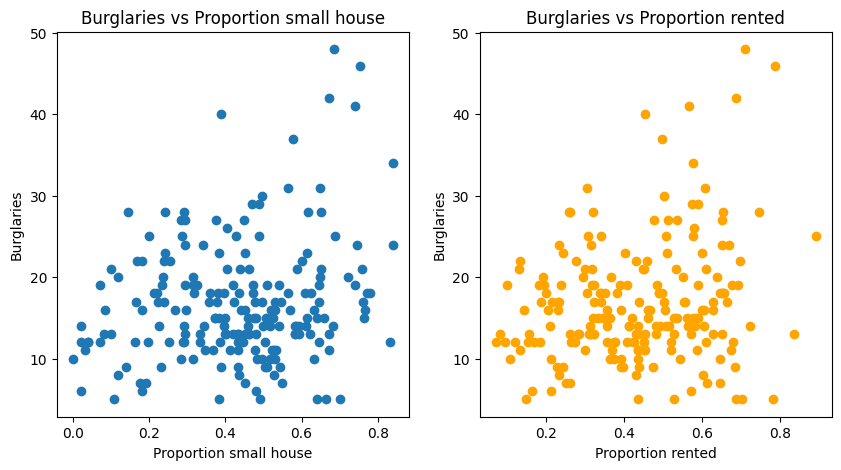

In [61]:

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

x1 = merged_df_house['Proportion small house']
y1 = merged_df_house['Burglaries']
axs[0].scatter(x1, y1)

x2 = merged_df_house['Proportion rented']
y2 = merged_df_house['Burglaries']
axs[1].scatter(x2, y2, c='orange')

# Adding title and axis labels
axs[0].set_title('Burglaries vs Proportion small house')
axs[0].set_xlabel('Proportion small house')
axs[0].set_ylabel('Burglaries')

axs[1].set_title('Burglaries vs Proportion rented')
axs[1].set_xlabel('Proportion rented')
axs[1].set_ylabel('Burglaries')
#plt.xlim(0,8)
#plt.ylim(0,60)
# Displaying the plot
plt.show()


In [62]:
lr_R = LinearRegression()
lr_S = LinearRegression()

X_R = merged_df_house['Proportion rented'].values.reshape(-1,1)
X_S = merged_df_house['Proportion small house'].values.reshape(-1,1)
Y = merged_df_house['Burglaries'].values.reshape(-1,1)

lr_R.fit(X_R, Y)
Y_R_pred = lr_R.predict(X_R)
lr_S.fit(X_S, Y)
Y_S_pred = lr_S.predict(X_S)

print("R^2 for Small home is " + str(lr_S.score(X_S, Y)) + " and for Rented is " + str(lr_R.score(X_R, Y)))

R^2 for Small home is 0.04128464461217618 and for Rented is 0.0441064079032345


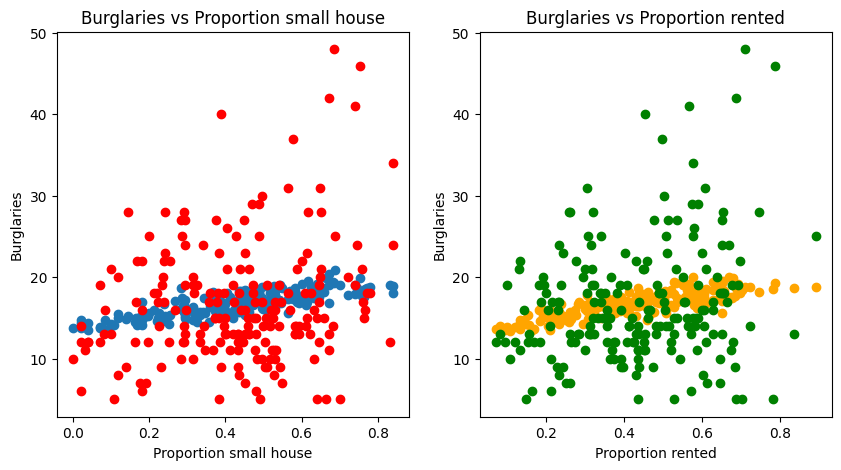

In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

x1 = X_S
y1 = Y_R_pred
axs[0].scatter(x1, y1)
axs[0].scatter(x1, Y, c='r')

x2 = X_R
y2 = Y_S_pred
axs[1].scatter(x2, y2, c='orange')
axs[1].scatter(x2, Y, c='g')

# Adding title and axis labels
axs[0].set_title('Burglaries vs Proportion small house')
axs[0].set_xlabel('Proportion small house')
axs[0].set_ylabel('Burglaries')

axs[1].set_title('Burglaries vs Proportion rented')
axs[1].set_xlabel('Proportion rented')
axs[1].set_ylabel('Burglaries')
#plt.xlim(0,8)
#plt.ylim(0,60)
# Displaying the plot
plt.show()

In [64]:
merged_df_dens = pd.merge(bar_df, df_dens, on=['LSOA code', "Year"])
merged_df_dens

,LSOA code,LSOA name_x,Year,Burglaries,LSOA name_y,Area Sq Km,People per Sq Km,Population,LSOA Name
0,E01000115,Barnet 009A,2011,8,Barnet 009A,0.2740,5401.459854,NaN,NaN
1,E01000115,Barnet 009A,2012,18,Barnet 009A,0.2740,5387.000000,1476.0,NaN
2,E01000115,Barnet 009A,2013,9,Barnet 009A,0.2740,5449.000000,1493.0,NaN
3,E01000115,Barnet 009A,2014,8,Barnet 009A,0.2740,5416.000000,1484.0,NaN
4,E01000115,Barnet 009A,2015,10,Barnet 009A,0.2740,5018.000000,1375.0,NaN
...,...,...,...,...,...,...,...,...,...
1894,E01033573,Barnet 030F,2015,7,Barnet 030F,0.1401,17052.000000,2389.0,NaN
1895,E01033573,Barnet 030F,2016,14,Barnet 030F,0.1401,17288.000000,2422.0,NaN
1896,E01033573,Barnet 030F,2017,12,Barnet 030F,0.1401,18743.754461,2626.0,NaN
1897,E01033573,Barnet 030F,2018,6,Barnet 030F,0.1401,19536.045682,2737.0,NaN


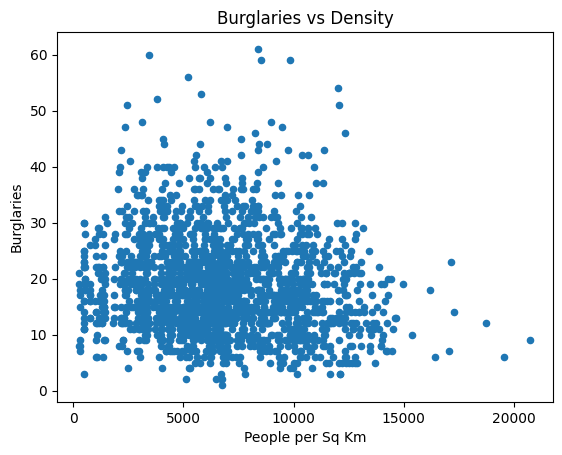

In [65]:
# Assuming you have a dataframe called df with columns 'Burglaries' and 'People per Sq Km'
x = merged_df_dens['People per Sq Km']
y = merged_df_dens['Burglaries']

# Creating the scatter plot
plt.scatter(x, y, s=20)

# Adding title and axis labels
plt.title('Burglaries vs Density')
plt.xlabel('People per Sq Km')
plt.ylabel('Burglaries')
#plt.xlim(0,20000)
#plt.ylim(0, 50)
# Displaying the plot
plt.show()


In [66]:
file_path =dataDir().joinpath("Household composition.xlsx")
df_grannies = pd.read_excel(file_path, sheet_name='2021')
df_grannies["Proportion old"]=df_grannies["One person Aged 66+"]/df_grannies['All households']
df_grannies

,LSOA code,local authority name,local authority code,All households,One person Aged 66+,One person Aged up to 65,Family: all aged 66+,Married or civil partnership couple: No children,Married or civil partnership couple: Dependent children,Married or civil partnership couple: non-dependent children,Cohabiting couple: No children,Cohabiting couple: Dependent children,Cohabiting couple: Non-dependent children,Lone parent: dependent children,Lone parent: non-dependent children,Other with dependent children,All other types,Proportion old
0,E01000001,City of London,E09000001,839,126,245,84,112,68,13,99,13,0,10,7,1,61,0.150179
1,E01000002,City of London,E09000001,831,101,309,59,105,44,10,96,10,3,13,15,2,64,0.121540
2,E01000003,City of London,E09000001,1023,161,422,31,108,44,15,104,16,5,22,21,1,73,0.157380
3,E01000005,City of London,E09000001,479,47,172,7,26,46,16,28,12,4,29,25,20,47,0.098121
4,E01032739,City of London,E09000001,882,18,406,7,92,27,10,148,1,0,7,8,4,154,0.020408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,Westminster,E09000033,735,78,199,59,102,87,34,27,4,3,23,29,41,49,0.106122
4990,E01035719,Westminster,E09000033,632,50,218,22,52,69,18,48,12,1,38,25,12,67,0.079114
4991,E01035720,Westminster,E09000033,595,51,183,20,37,52,10,52,23,1,33,54,5,74,0.085714
4992,E01035721,Westminster,E09000033,1307,139,616,42,99,89,30,49,8,4,64,59,27,81,0.106350


In [67]:

df_gran_merged = pd.merge(bar_df, df_grannies, how='left', on='LSOA code')
df_gran_merged

,LSOA code,LSOA name,Year,Burglaries,local authority name,local authority code,All households,One person Aged 66+,One person Aged up to 65,Family: all aged 66+,...,Married or civil partnership couple: Dependent children,Married or civil partnership couple: non-dependent children,Cohabiting couple: No children,Cohabiting couple: Dependent children,Cohabiting couple: Non-dependent children,Lone parent: dependent children,Lone parent: non-dependent children,Other with dependent children,All other types,Proportion old
0,E01000115,Barnet 009A,2011,8,Barnet,E09000003,486.0,51.0,30.0,55.0,...,108.0,85.0,6.0,9.0,3.0,11.0,22.0,23.0,32.0,0.104938
1,E01000115,Barnet 009A,2012,18,Barnet,E09000003,486.0,51.0,30.0,55.0,...,108.0,85.0,6.0,9.0,3.0,11.0,22.0,23.0,32.0,0.104938
2,E01000115,Barnet 009A,2013,9,Barnet,E09000003,486.0,51.0,30.0,55.0,...,108.0,85.0,6.0,9.0,3.0,11.0,22.0,23.0,32.0,0.104938
3,E01000115,Barnet 009A,2014,8,Barnet,E09000003,486.0,51.0,30.0,55.0,...,108.0,85.0,6.0,9.0,3.0,11.0,22.0,23.0,32.0,0.104938
4,E01000115,Barnet 009A,2015,10,Barnet,E09000003,486.0,51.0,30.0,55.0,...,108.0,85.0,6.0,9.0,3.0,11.0,22.0,23.0,32.0,0.104938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,E01033573,Barnet 030F,2019,9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830,E01033573,Barnet 030F,2020,25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2831,E01033573,Barnet 030F,2021,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2832,E01033573,Barnet 030F,2022,54,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


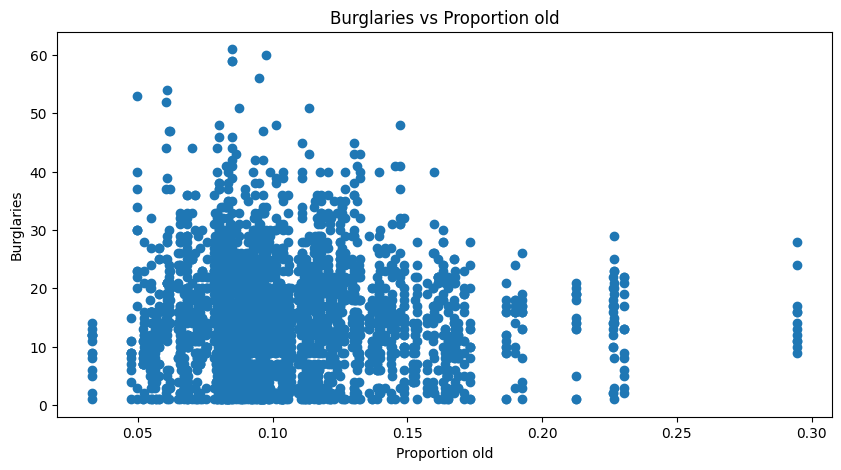

In [68]:
fig, axs = plt.subplots(ncols=1, figsize=(10, 5))

x1 = df_gran_merged['Proportion old']
y1 = df_gran_merged['Burglaries']
axs.scatter(x1, y1)

# Adding title and axis labels
axs.set_title('Burglaries vs Proportion old')  # Remove the indexing
axs.set_xlabel('Proportion old')  # Remove the indexing
axs.set_ylabel('Burglaries')  # Remove the indexing

# plt.xlim(0, 8)
# plt.ylim(0, 60)
# Displaying the plot
plt.show()
